## Section 1: Environment Setup

Let's import our quantum tools.

In [1]:
# Quantum computing framework
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector

# Visualization
import numpy as np
import matplotlib.pyplot as plt

# Custom plotting utilities
import sys
sys.path.append('..')
from utils.plotting import configure_beautiful_plots, COLORS

# Configure beautiful plots
configure_beautiful_plots()

print("✅ All imports successful!")
print("✅ Ready to explore superposition")

✅ All imports successful!
✅ Ready to explore superposition


## 🤔 INTUITION: Flipping a Coin

**Classical coin flip:**
- You flip a coin
- While in the air: 50% heads, 50% tails (classical probability)
- When it lands: definite result (100% heads OR 100% tails)
- **Key**: The coin is always in ONE state, we just don't know which

**Quantum "coin flip":**
- Apply Hadamard gate to |0⟩
- Before measurement: **both** 0 AND 1 simultaneously (superposition)
- When measured: collapses to definite result (50% chance each)
- **Key**: The qubit is ACTUALLY in both states until measured

## 💡 CONCEPT: Classical Probability vs Quantum Superposition

Let's demonstrate the difference with simulations.

**Classical random bit:**
```python
import random
bit = random.choice([0, 1])  # Picks ONE value
```

**Quantum superposition:**
```
H|0⟩ = |+⟩ = (|0⟩ + |1⟩)/√2  # Both values simultaneously!
```

**How to prove they're different?**  
We can't directly "see" superposition (measurement destroys it), but we can observe its effects through repeated experiments and interference patterns (next notebook!).

## 💻 IMPLEMENTATION: Classical Random Bit Generator

Classical Random Bit Generator
Result 0: 498 times (49.8%)
Result 1: 502 times (50.2%)

📊 This is classical probability
   Each bit was ALWAYS 0 or 1, we just picked randomly


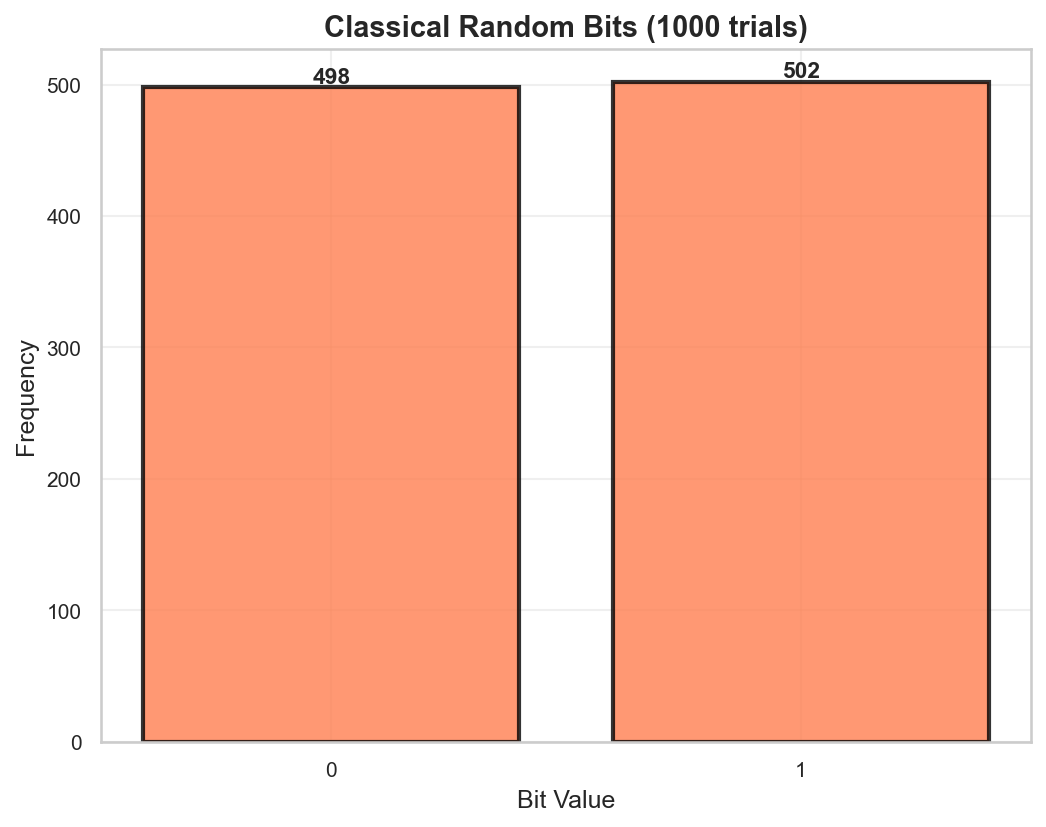

In [2]:
# Classical random bit generator
import random

# Generate 1000 random bits
classical_results = [random.choice([0, 1]) for _ in range(1000)]

# Count results
count_0 = classical_results.count(0)
count_1 = classical_results.count(1)

print("Classical Random Bit Generator")
print("="*50)
print(f"Result 0: {count_0} times ({count_0/10:.1f}%)")
print(f"Result 1: {count_1} times ({count_1/10:.1f}%)")
print("\n📊 This is classical probability")
print("   Each bit was ALWAYS 0 or 1, we just picked randomly")

# Visualize
fig, ax = plt.subplots(figsize=(8, 6), dpi=150)
states = ['0', '1']
values = [count_0, count_1]
ax.bar(states, values, color=COLORS['classical'], 
       edgecolor='black', linewidth=2, alpha=0.8)
ax.set_xlabel('Bit Value', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('Classical Random Bits (1000 trials)', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate(values):
    ax.text(i, v, f'{v}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.show()

## 💻 IMPLEMENTATION: The Hadamard Gate

**What we'll do**: Apply the Hadamard (H) gate to create quantum superposition

**Why**: The H gate transforms a definite state into a superposition state:
- H|0⟩ = |+⟩ = (|0⟩ + |1⟩)/√2
- H|1⟩ = |-⟩ = (|0⟩ - |1⟩)/√2

**How**: Create circuit, apply H gate, measure multiple times

**Expected**: Equal probability of measuring 0 or 1 (≈50% each)

Quantum circuit with Hadamard gate:


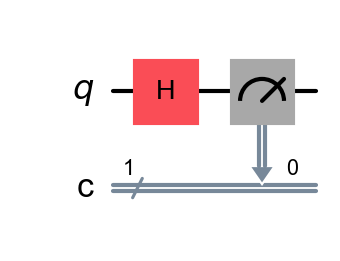


📝 The H gate creates superposition:
   Before H: |0⟩ (definitely 0)
   After H:  |+⟩ = (|0⟩ + |1⟩)/√2 (both 0 AND 1!)


In [3]:
# Create quantum circuit with Hadamard gate
qc = QuantumCircuit(1, 1)
qc.h(0)  # Apply Hadamard to qubit 0
qc.measure(0, 0)

# Display circuit
print("Quantum circuit with Hadamard gate:")
display(qc.draw('mpl'))

print("\n📝 The H gate creates superposition:")
print("   Before H: |0⟩ (definitely 0)")
print("   After H:  |+⟩ = (|0⟩ + |1⟩)/√2 (both 0 AND 1!)")

## 💻 IMPLEMENTATION: Measuring Superposition

Quantum Superposition Results (1000 measurements)
Result 0: 478 times (47.8%)
Result 1: 522 times (52.2%)

⚛️  This is quantum superposition!
   The qubit was in BOTH states until we measured it


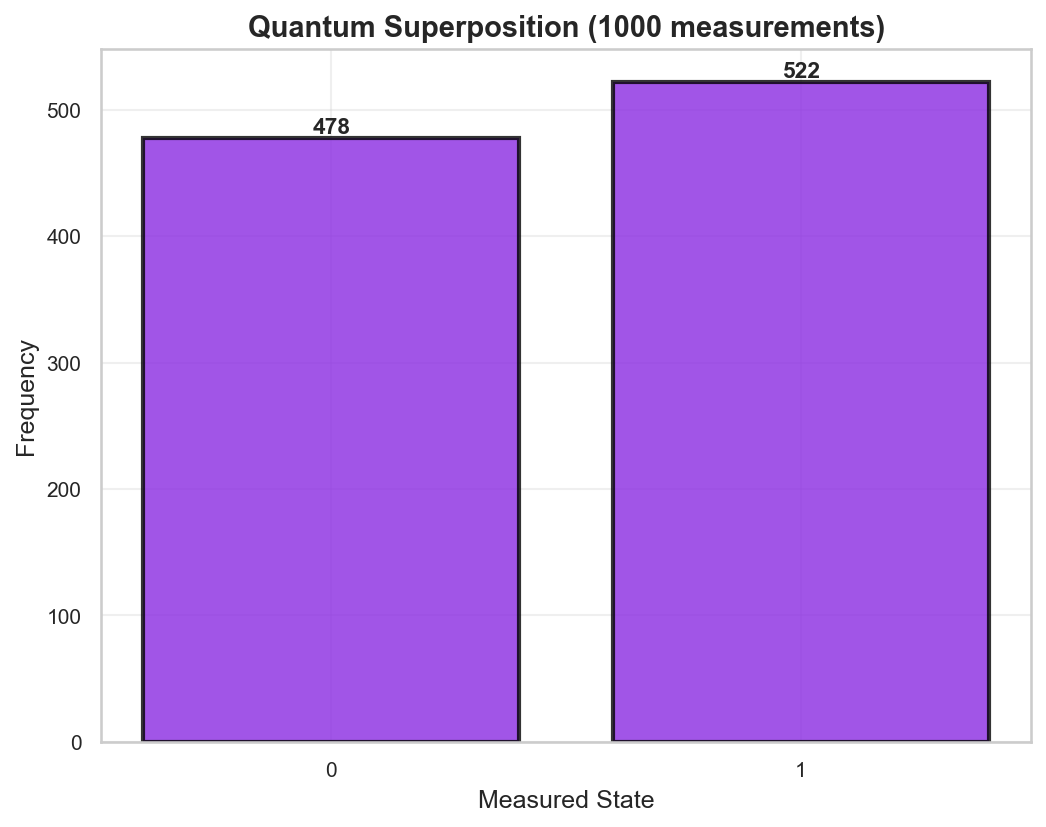

In [4]:
# Execute the quantum circuit
simulator = AerSimulator()
job = simulator.run(qc, shots=1000)
counts = job.result().get_counts()

# Display results
print("Quantum Superposition Results (1000 measurements)")
print("="*50)
count_0 = counts.get('0', 0)
count_1 = counts.get('1', 0)
print(f"Result 0: {count_0} times ({count_0/10:.1f}%)")
print(f"Result 1: {count_1} times ({count_1/10:.1f}%)")
print("\n⚛️  This is quantum superposition!")
print("   The qubit was in BOTH states until we measured it")

# Visualize
fig, ax = plt.subplots(figsize=(8, 6), dpi=150)
states = ['0', '1']
values = [count_0, count_1]
ax.bar(states, values, color=COLORS['quantum'], 
       edgecolor='black', linewidth=2, alpha=0.8)
ax.set_xlabel('Measured State', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('Quantum Superposition (1000 measurements)', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate(values):
    ax.text(i, v, f'{v}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.show()

## 📊 VISUALIZATION: Superposition on the Bloch Sphere

**What we'll see**: The |+⟩ state is on the equator of the Bloch sphere

**Why**: 
- North pole (|0⟩) and South pole (|1⟩) are definite states
- Equator represents equal superpositions
- |+⟩ is at the intersection of equator and positive X-axis

**How**: Visualize state before measurement using Statevector

State |+⟩ = (|0⟩ + |1⟩)/√2
Amplitudes: [0.70710678+0.j 0.70710678+0.j]

On the Bloch sphere:


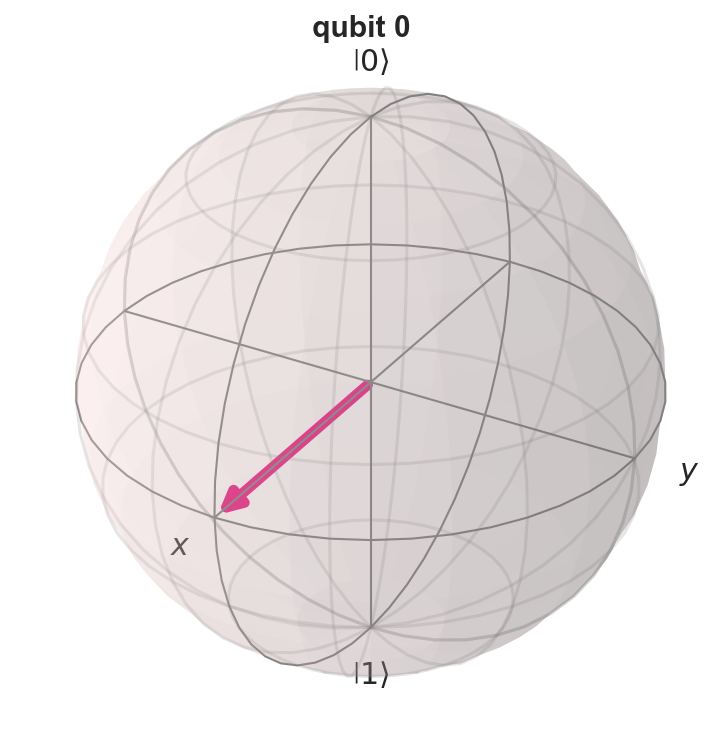

🌐 The |+⟩ state is on the EQUATOR at the positive X-axis
   This represents a perfect 50/50 superposition


In [5]:
# Create circuit without measurement to see the state
qc_state = QuantumCircuit(1)
qc_state.h(0)

# Get the statevector
statevector = Statevector(qc_state)

print("State |+⟩ = (|0⟩ + |1⟩)/√2")
print(f"Amplitudes: {statevector.data}")
print("\nOn the Bloch sphere:")
display(plot_bloch_multivector(statevector))

print("🌐 The |+⟩ state is on the EQUATOR at the positive X-axis")
print("   This represents a perfect 50/50 superposition")

## 💡 CONCEPT: Comparing Classical vs Quantum

Let's compare the two side-by-side to see they give the same measurement statistics.

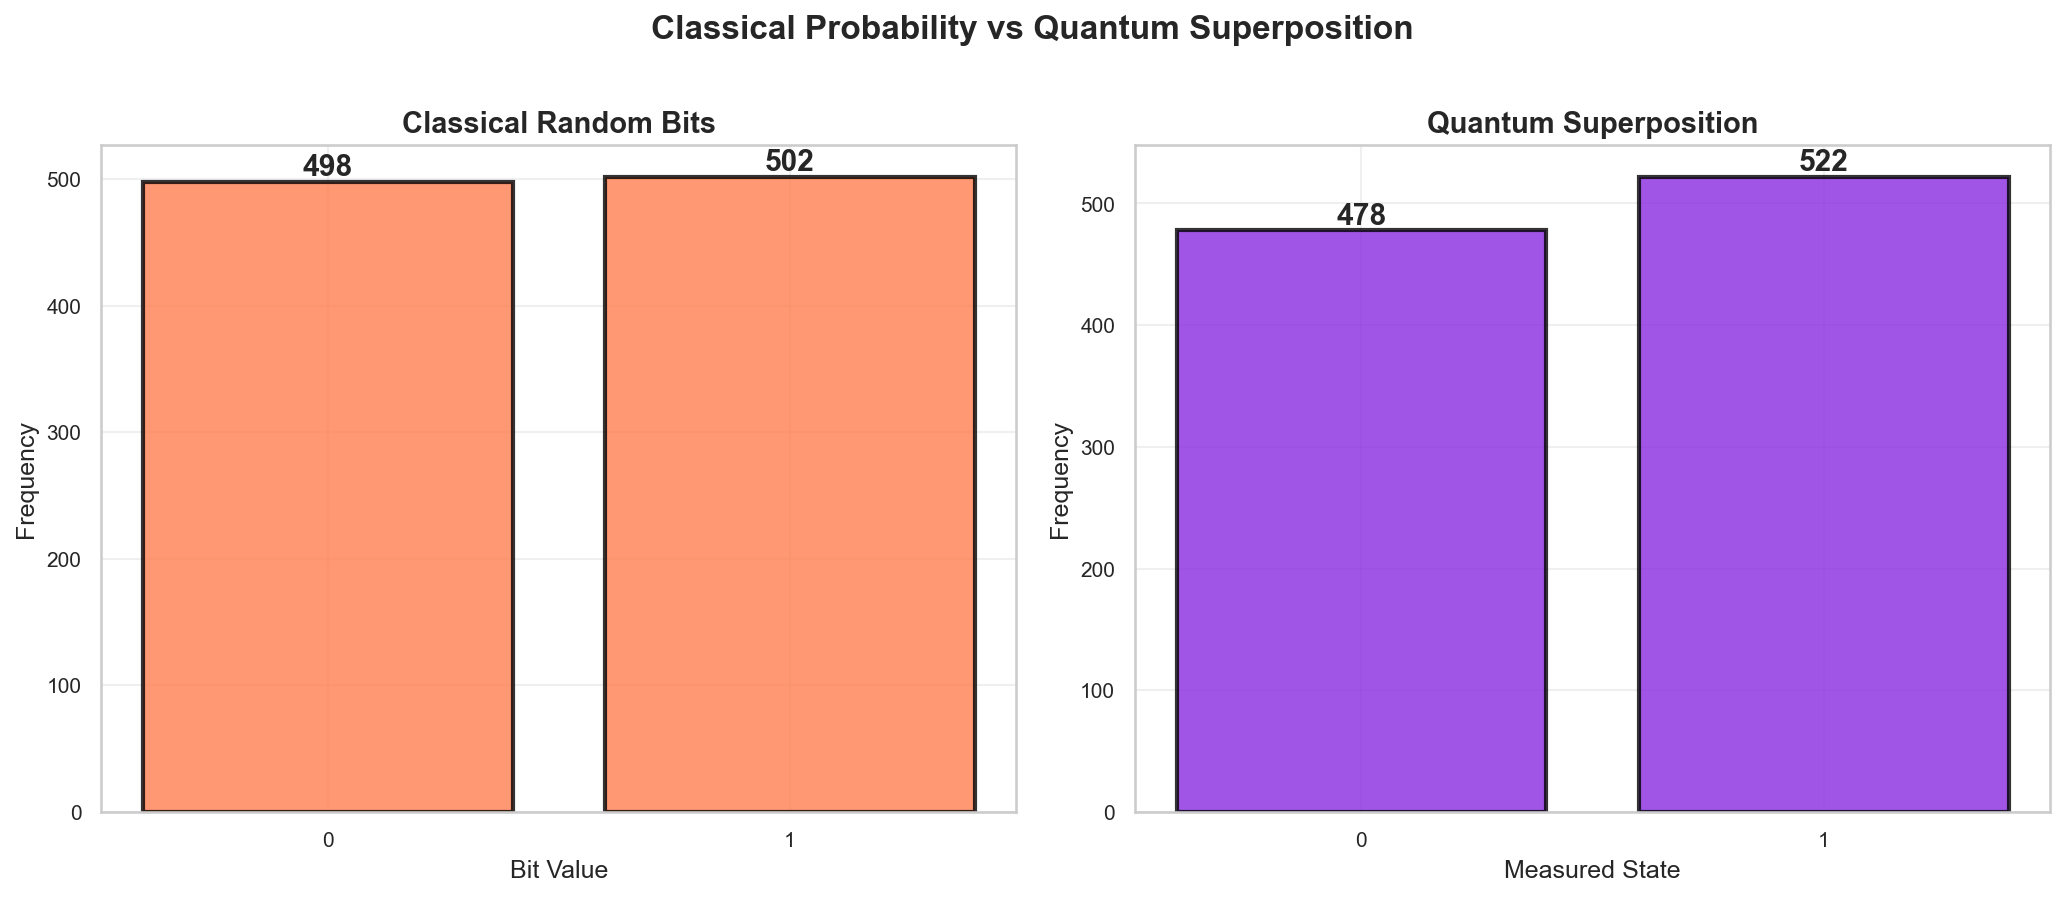


🔬 Observation:
   Same measurement statistics (50/50)
   BUT fundamentally different:
   • Classical: bit is always 0 OR 1, we pick randomly
   • Quantum: qubit is 0 AND 1 until measured!

💡 The difference will become clear with interference (Notebook 2)


In [6]:
# Side-by-side comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), dpi=150)

# Classical
classical_0 = classical_results.count(0)
classical_1 = classical_results.count(1)
ax1.bar(['0', '1'], [classical_0, classical_1], 
        color=COLORS['classical'], edgecolor='black', linewidth=2, alpha=0.8)
ax1.set_title('Classical Random Bits', fontsize=14, fontweight='bold')
ax1.set_ylabel('Frequency', fontsize=12)
ax1.set_xlabel('Bit Value', fontsize=12)
ax1.grid(axis='y', alpha=0.3)
ax1.text(0, classical_0, f'{classical_0}', ha='center', va='bottom', fontweight='bold')
ax1.text(1, classical_1, f'{classical_1}', ha='center', va='bottom', fontweight='bold')

# Quantum
ax2.bar(['0', '1'], [count_0, count_1], 
        color=COLORS['quantum'], edgecolor='black', linewidth=2, alpha=0.8)
ax2.set_title('Quantum Superposition', fontsize=14, fontweight='bold')
ax2.set_ylabel('Frequency', fontsize=12)
ax2.set_xlabel('Measured State', fontsize=12)
ax2.grid(axis='y', alpha=0.3)
ax2.text(0, count_0, f'{count_0}', ha='center', va='bottom', fontweight='bold')
ax2.text(1, count_1, f'{count_1}', ha='center', va='bottom', fontweight='bold')

plt.suptitle('Classical Probability vs Quantum Superposition', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("\n🔬 Observation:")
print("   Same measurement statistics (50/50)")
print("   BUT fundamentally different:")
print("   • Classical: bit is always 0 OR 1, we pick randomly")
print("   • Quantum: qubit is 0 AND 1 until measured!")
print("\n💡 The difference will become clear with interference (Notebook 2)")

## 💡 CONCEPT: Different Superposition States

The H gate isn't the only way to create superposition. We can create ANY state on the Bloch sphere using rotation gates.

**Key insight**: Superposition ≠ always 50/50. It means being in multiple states simultaneously, with different probabilities.

In [7]:
# Different superposition states
states_to_create = [
    ("75% |0⟩, 25% |1⟩", np.pi/3),
    ("50% |0⟩, 50% |1⟩", np.pi/2),
    ("25% |0⟩, 75% |1⟩", 2*np.pi/3)
]

print("Creating Different Superposition States")
print("="*50)

for label, theta in states_to_create:
    # Create circuit
    qc = QuantumCircuit(1, 1)
    qc.ry(theta, 0)  # RY rotation creates superposition
    qc.measure(0, 0)
    
    # Execute
    job = simulator.run(qc, shots=1000)
    counts = job.result().get_counts()
    
    c0 = counts.get('0', 0)
    c1 = counts.get('1', 0)
    
    print(f"\n{label}:")
    print(f"  Measured: {c0/10:.1f}% |0⟩, {c1/10:.1f}% |1⟩")

print("\n💡 Superposition can have ANY probabilities, not just 50/50!")

Creating Different Superposition States

75% |0⟩, 25% |1⟩:
  Measured: 75.6% |0⟩, 24.4% |1⟩

50% |0⟩, 50% |1⟩:
  Measured: 50.9% |0⟩, 49.1% |1⟩

25% |0⟩, 75% |1⟩:
  Measured: 25.6% |0⟩, 74.4% |1⟩

💡 Superposition can have ANY probabilities, not just 50/50!


## 📊 VISUALIZATION: Multiple Superposition States

Different Superposition States on Bloch Sphere

~85% |0⟩:


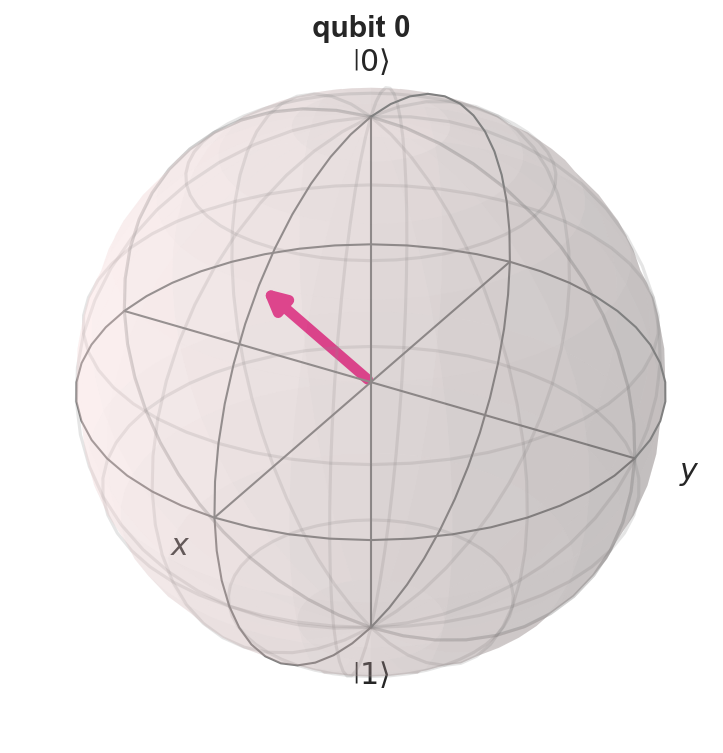


50% |0⟩:


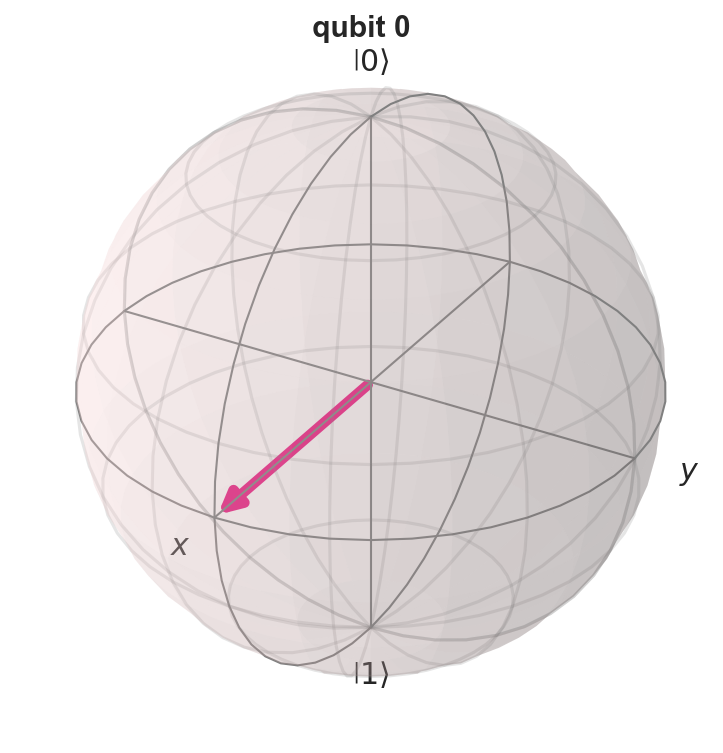


~15% |0⟩:


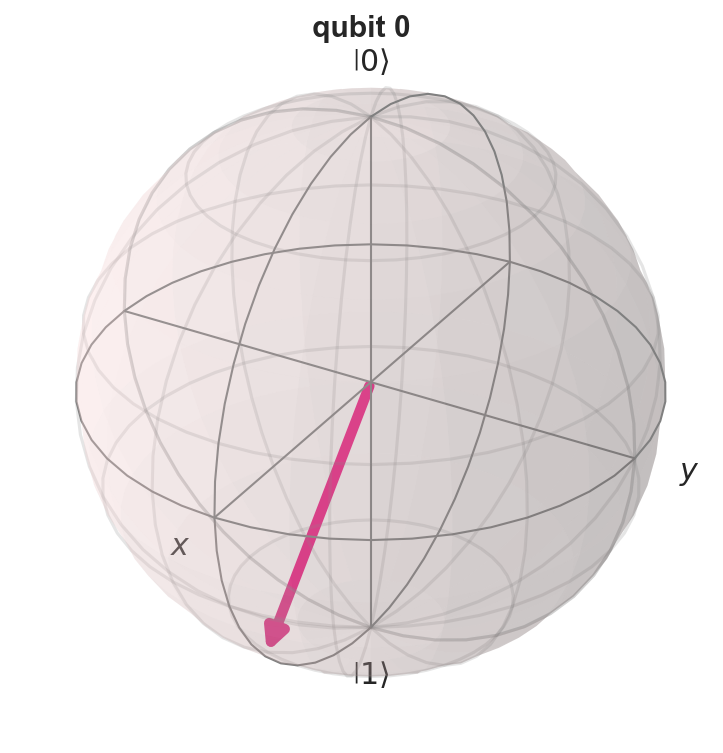


🌐 All points on the Bloch sphere represent valid quantum states
   The height determines the probability of measuring |0⟩ vs |1⟩


In [8]:
# Visualize multiple superposition states on Bloch sphere
angles = [np.pi/4, np.pi/2, 3*np.pi/4]
labels = ["~85% |0⟩", "50% |0⟩", "~15% |0⟩"]

print("Different Superposition States on Bloch Sphere")
print("="*50)

for angle, label in zip(angles, labels):
    qc = QuantumCircuit(1)
    qc.ry(angle, 0)
    sv = Statevector(qc)
    
    print(f"\n{label}:")
    display(plot_bloch_multivector(sv))

print("\n🌐 All points on the Bloch sphere represent valid quantum states")
print("   The height determines the probability of measuring |0⟩ vs |1⟩")

## 🎯 CHECKPOINT: Can you...

Check your understanding:

- [ ] Explain the difference between classical probability and quantum superposition?
- [ ] Create a circuit with the Hadamard gate?
- [ ] Interpret measurement results from a superposition state?
- [ ] Identify |+⟩ on the Bloch sphere?

## 🎯 Guided Exercise: Create Custom Superpositions

**Question**: How would you create a state with 70% probability of |0⟩?

🤔 **Think before coding**:
- [ ] Use H gate (gives 50/50)
- [ ] Use RY gate with angle ≈ 0.928 radians
- [ ] Use X gate (gives 100% |1⟩)

<details>
<summary>👉 Click for hint</summary>

The RY(θ) gate creates the state:
$$|\psi\rangle = \cos(\theta/2)|0\rangle + \sin(\theta/2)|1\rangle$$

For 70% probability of |0⟩:
$$\cos^2(\theta/2) = 0.7$$
$$\theta = 2 \arccos(\sqrt{0.7}) \approx 0.928$$

</details>

<details>
<summary>👉 Click for solution</summary>

```python
qc = QuantumCircuit(1, 1)
theta = 2 * np.arccos(np.sqrt(0.7))
qc.ry(theta, 0)
qc.measure(0, 0)
```

</details>

In [9]:
# 🟢 Level 1: Test the solution
# Uncomment and run:

# qc = QuantumCircuit(1, 1)
# theta = 2 * np.arccos(np.sqrt(0.7))
# qc.ry(theta, 0)
# qc.measure(0, 0)

# job = simulator.run(qc, shots=1000)
# counts = job.result().get_counts()
# print(f"Result: {counts.get('0', 0)/10:.1f}% |0⟩, {counts.get('1', 0)/10:.1f}% |1⟩")

## 🎯 Quick Quiz

**1. What does the Hadamard gate do?**
- [ ] Flips |0⟩ to |1⟩
- [x] Creates equal superposition (|0⟩ + |1⟩)/√2
- [ ] Measures the qubit

**2. On the Bloch sphere, where is the |+⟩ state?**
- [ ] North pole
- [ ] South pole
- [x] Equator at positive X-axis

**3. What happens when you measure a superposition?**
- [ ] You see both values simultaneously
- [x] The state collapses to one definite value
- [ ] Nothing, the superposition remains

**4. Is classical probability the same as quantum superposition?**
- [ ] Yes, they give the same results
- [x] No, quantum superposition is fundamentally different
- [ ] Yes, they're identical

## 🎓 Notebook 1 Summary

**What you learned:**
✅ Difference between classical probability and quantum superposition  
✅ The Hadamard gate creates equal superposition  
✅ Measurement collapses superposition to a definite state  
✅ Superposition can have any probability distribution  
✅ Visualizing superposition on the Bloch sphere  

**Key Insight**: 
Quantum superposition means the qubit is **actually** in multiple states simultaneously, not just that we don't know which state it's in!

**Progress**: ⬛⬛⬜⬜⬜⬜⬜ (2/7 completed)

---

## 🚀 Next Step: Notebook 2 - Rotations & Interference

Now that you understand superposition, we'll explore:
- Pauli gates (X, Y, Z) and arbitrary rotations
- **Quantum interference** - the key difference from classical probability!
- Phase and why it matters

This is where quantum computing becomes truly different from classical computing! 🌊